In [1]:
import airsim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.interpolate import splprep, splev

from utils import Gate 
from client import Simulator


sim = Simulator()
sim.get_gates(7)
# get gate_2 manually because there is some bug in the api
sim.gates[1] = Gate.from_unreal_position(-300, 7640, 100, yaw=50.0)
p = sim.track_position_matrix()

# interpolation (3rd degree with some smoothing)
tck, u = splprep(p.T, u=None, s=5.0, per=1, k=3) 
u_new = np.linspace(u.min(), u.max(), 1000)
ev = np.array(splev(u_new, tck, der=0)).T

Connected!
Client Ver:1 (Min Req: 1), Server Ver:1 (Min Req: 1)

gate_2 was nan


In [2]:
# plot
def plot_gates(xx, yy):
    fig, ax = plt.subplots()
    plt.plot(ev[:,xx], ev[:,yy], 'b--')
    ax.scatter(p[:,xx], p[:,yy])
    for i in range(7):
        ax.annotate(str(i+1), (p[i, xx], p[i, yy]))

In [3]:
p

array([[ -0.90000004,  11.80000019,  -2.5       ],
       [-30.56418141,  59.5       ,  12.5       ],
       [-65.88696781,  81.5       ,  12.5       ],
       [-91.90000153,  39.20000076,  12.5       ],
       [-88.99046272,  -3.79999995,  12.5       ],
       [-77.44999674, -33.29999924,  12.5       ],
       [-41.75000017, -38.39999771,  12.5       ],
       [ -0.90000004,  11.80000019,  -2.5       ]])

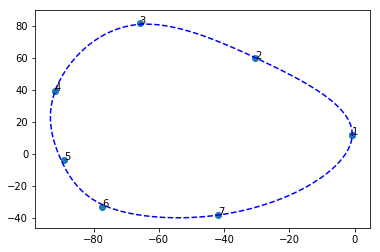

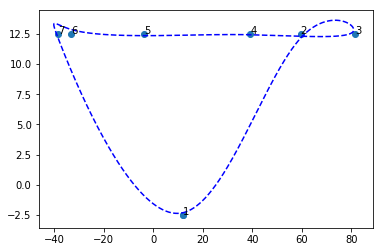

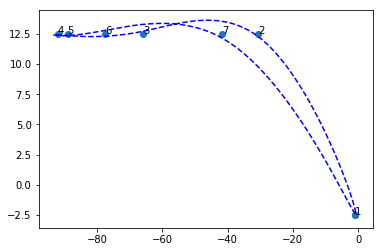

In [4]:
plot_gates(0, 1)
plot_gates(1,2)
plot_gates(0,2)

In [5]:
# Loop the drone through the track using simSetVehiclePose
import time
client = airsim.VehicleClient()
client.confirmConnection()
i = 0
pose = client.simGetVehiclePose()
while True:
    print(i % len(ev))
    pos = ev[i % len(ev), :]
    print("Sent position:", pos)
    pose.position = airsim.Vector3r(pos[0], pos[1], pos[2])
    success = client.simSetVehiclePose(pose, True)
    time.sleep(0.01)
    i += 1

Connected!
Client Ver:1 (Min Req: 1), Server Ver:1 (Min Req: 1)

0
Sent position: [-0.78137826 11.63538525 -2.32778996]
1
Sent position: [-0.77880364 11.93504906 -2.31484369]
2
Sent position: [-0.77886357 12.23421355 -2.30004406]
3
Sent position: [-0.78154596 12.53288194 -2.28340935]
4
Sent position: [-0.78683871 12.83105746 -2.26495783]
5
Sent position: [-0.79472971 13.12874332 -2.24470778]
6
Sent position: [-0.80520687 13.42594273 -2.22267748]
7
Sent position: [-0.81825809 13.72265892 -2.19888518]
8
Sent position: [-0.83387128 14.01889511 -2.17334918]
9
Sent position: [-0.85203432 14.31465451 -2.14608773]
10
Sent position: [-0.87273514 14.60994034 -2.11711912]
11
Sent position: [-0.89596162 14.90475582 -2.08646162]
12
Sent position: [-0.92170167 15.19910417 -2.05413349]
13
Sent position: [-0.9499432  15.4929886  -2.02015302]
14
Sent position: [-0.98067409 15.78641234 -1.98453848]
15
Sent position: [-1.01388226 16.0793786  -1.94730814]
16
Sent position: [-1.04955561 16.3718906  -1.908

152
Sent position: [-23.68220137  53.30076845  10.42386185]
153
Sent position: [-23.94123959  53.56146882  10.50881257]
154
Sent position: [-24.20107344  53.82215904  10.59283908]
155
Sent position: [-24.46169081  54.08284234  10.67592312]
156
Sent position: [-24.72307962  54.34352193  10.75804642]
157
Sent position: [-24.98522775  54.60420104  10.8391907 ]
158
Sent position: [-25.24812311  54.86488287  10.91933768]
159
Sent position: [-25.51175361  55.12557065  10.9984691 ]
160
Sent position: [-25.77610714  55.38626759  11.07656667]
161
Sent position: [-26.04117161  55.64697692  11.15361214]
162
Sent position: [-26.30693491  55.90770185  11.22958721]
163
Sent position: [-26.57338496  56.1684456   11.30447363]
164
Sent position: [-26.84050965  56.42921139  11.37825312]
165
Sent position: [-27.10829688  56.69000243  11.45090739]
166
Sent position: [-27.37673456  56.95082195  11.52241819]
167
Sent position: [-27.64581059  57.21167317  11.59276724]
168
Sent position: [-27.91551286  57.472

304
Sent position: [-65.70885477  80.77006124  12.72393195]
305
Sent position: [-65.96111084  80.73342582  12.70976302]
306
Sent position: [-66.21250076  80.69200758  12.69586857]
307
Sent position: [-66.46301884  80.64582774  12.6822492 ]
308
Sent position: [-66.71266058  80.59492146  12.6689026 ]
309
Sent position: [-66.96142149  80.53932393  12.65582645]
310
Sent position: [-67.20929707  80.4790703   12.64301844]
311
Sent position: [-67.45628281  80.41419574  12.63047626]
312
Sent position: [-67.70237422  80.34473543  12.61819759]
313
Sent position: [-67.94756681  80.27072454  12.60618013]
314
Sent position: [-68.19185606  80.19219824  12.59442156]
315
Sent position: [-68.43523749  80.10919168  12.58291958]
316
Sent position: [-68.67770659  80.02174006  12.57167186]
317
Sent position: [-68.91925887  79.92987852  12.5606761 ]
318
Sent position: [-69.15988982  79.83364225  12.54992998]
319
Sent position: [-69.39959495  79.73306642  12.53943119]
320
Sent position: [-69.63836976  79.628

456
Sent position: [-91.51698496  40.33614426  12.42641088]
457
Sent position: [-91.58577884  39.97401971  12.42786769]
458
Sent position: [-91.65302413  39.61243534  12.42925116]
459
Sent position: [-91.71872643  39.25139137  12.43056189]
460
Sent position: [-91.78289274  38.89088317  12.43180087]
461
Sent position: [-91.84553008  38.53090613  12.43296909]
462
Sent position: [-91.90664545  38.17145563  12.43406753]
463
Sent position: [-91.96624587  37.81252705  12.4350972 ]
464
Sent position: [-92.02433833  37.45411577  12.43605907]
465
Sent position: [-92.08092985  37.09621718  12.43695413]
466
Sent position: [-92.13602744  36.73882665  12.43778339]
467
Sent position: [-92.18963809  36.38193958  12.43854781]
468
Sent position: [-92.24176883  36.02555133  12.43924841]
469
Sent position: [-92.29242665  35.6696573   12.43988615]
470
Sent position: [-92.34161856  35.31425286  12.44046205]
471
Sent position: [-92.38935158  34.9593334   12.44097707]
472
Sent position: [-92.43563271  34.604

608
Sent position: [-88.17494711 -11.06275061  12.36988222]
609
Sent position: [-88.08330524 -11.38848185  12.37153494]
610
Sent position: [-87.99063437 -11.71369173  12.37326912]
611
Sent position: [-87.89691473 -12.03835145  12.37508597]
612
Sent position: [-87.80212651 -12.36243224  12.37698671]
613
Sent position: [-87.70624993 -12.68590531  12.37897258]
614
Sent position: [-87.6092652  -13.00874186  12.3810448 ]
615
Sent position: [-87.51115253 -13.33091313  12.38320458]
616
Sent position: [-87.41189214 -13.65239032  12.38545316]
617
Sent position: [-87.31146422 -13.97314464  12.38779176]
618
Sent position: [-87.20984899 -14.29314732  12.39022159]
619
Sent position: [-87.10702667 -14.61236956  12.3927439 ]
620
Sent position: [-87.00297746 -14.93078258  12.3953599 ]
621
Sent position: [-86.89768157 -15.24835761  12.39807081]
622
Sent position: [-86.79111922 -15.56506584  12.40087786]
623
Sent position: [-86.68327061 -15.8808785   12.40378227]
624
Sent position: [-86.57411595 -16.195

760
Sent position: [-54.41156289 -40.15286782  13.2721616 ]
761
Sent position: [-54.07243014 -40.1539343   13.25996732]
762
Sent position: [-53.73291475 -40.15238557  13.24695852]
763
Sent position: [-53.39304535 -40.14822309  13.23312207]
764
Sent position: [-53.0528506  -40.14144833  13.21844487]
765
Sent position: [-52.71235915 -40.13206274  13.20291378]
766
Sent position: [-52.37159965 -40.12006778  13.1865157 ]
767
Sent position: [-52.03060076 -40.10546491  13.1692375 ]
768
Sent position: [-51.68939113 -40.08825558  13.15106606]
769
Sent position: [-51.34799941 -40.06844125  13.13198827]
770
Sent position: [-51.00645424 -40.04602339  13.11199099]
771
Sent position: [-50.66478429 -40.02100345  13.09106113]
772
Sent position: [-50.3230182  -39.99338288  13.06918555]
773
Sent position: [-49.98118463 -39.96316314  13.04635114]
774
Sent position: [-49.63931222 -39.9303457   13.02254478]
775
Sent position: [-49.29742963 -39.89493202  12.99775334]
776
Sent position: [-48.95556552 -39.856

912
Sent position: [-10.03934219 -14.70220597   2.01219225]
913
Sent position: [ -9.84391328 -14.41529952   1.9201918 ]
914
Sent position: [ -9.65027123 -14.12759733   1.82873242]
915
Sent position: [ -9.45842606 -13.83911451   1.73782958]
916
Sent position: [ -9.26838774 -13.54986614   1.64749875]
917
Sent position: [ -9.08016628 -13.25986733   1.55775541]
918
Sent position: [ -8.89377168 -12.96913317   1.46861503]
919
Sent position: [ -8.70921393 -12.67767875   1.38009308]
920
Sent position: [ -8.52650304 -12.38551917   1.29220502]
921
Sent position: [ -8.34564899 -12.09266953   1.20496635]
922
Sent position: [ -8.16666179 -11.79914493   1.11839251]
923
Sent position: [ -7.98955143 -11.50496045   1.03249899]
924
Sent position: [ -7.81432792 -11.2101312    0.94730126]
925
Sent position: [ -7.64100124 -10.91467227   0.86281479]
926
Sent position: [ -7.4695814  -10.61859877   0.77905504]
927
Sent position: [ -7.3000784  -10.32192577   0.6960375 ]
928
Sent position: [ -7.13250222 -10.024

64
Sent position: [-5.4237995  29.94133481  1.47578949]
65
Sent position: [-5.56544621 30.21553043  1.57051123]
66
Sent position: [-5.70895319 30.4894327   1.66591684]
67
Sent position: [-5.85430834 30.76304484  1.76198803]
68
Sent position: [-6.00149956 31.03637007  1.85870653]
69
Sent position: [-6.15051474 31.3094116   1.95605406]
70
Sent position: [-6.30134181 31.58217266  2.05401236]
71
Sent position: [-6.45396864 31.85465647  2.15256315]
72
Sent position: [-6.60838316 32.12686623  2.25168816]
73
Sent position: [-6.76457325 32.39880518  2.35136911]
74
Sent position: [-6.92252683 32.67047652  2.45158773]
75
Sent position: [-7.08223178 32.94188348  2.55232574]
76
Sent position: [-7.24367603 33.21302927  2.65356489]
77
Sent position: [-7.40684745 33.48391711  2.75528688]
78
Sent position: [-7.57173397 33.75455023  2.85747344]
79
Sent position: [-7.73832348 34.02493183  2.96010631]
80
Sent position: [-7.90660387 34.29506515  3.06316722]
81
Sent position: [-8.07656306 34.56495338  3.16

216
Sent position: [-41.37344726  69.71388218  13.52694705]
217
Sent position: [-41.66005349  69.94936714  13.53934228]
218
Sent position: [-41.94673538  70.1834228   13.55087008]
219
Sent position: [-42.23348222  70.41601092  13.56154345]
220
Sent position: [-42.5202833   70.64709329  13.57137538]
221
Sent position: [-42.8071279   70.87663167  13.58037889]
222
Sent position: [-43.09400531  71.10458783  13.58856697]
223
Sent position: [-43.38090482  71.33092355  13.59595262]
224
Sent position: [-43.66781572  71.55560059  13.60254885]
225
Sent position: [-43.95472728  71.77858072  13.60836866]
226
Sent position: [-44.24162881  71.99982572  13.61342505]
227
Sent position: [-44.52850959  72.21929735  13.61773102]
228
Sent position: [-44.81535889  72.43695739  13.62129957]
229
Sent position: [-45.10216602  72.65276761  13.6241437 ]
230
Sent position: [-45.38892026  72.86668978  13.62627642]
231
Sent position: [-45.6756109   73.07868566  13.62771073]
232
Sent position: [-45.96222721  73.288

368
Sent position: [-79.91732703  70.22128779  12.27982048]
369
Sent position: [-80.10500511  69.94857484  12.27874024]
370
Sent position: [-80.29152793  69.67331597  12.2777894 ]
371
Sent position: [-80.47689098  69.39554635  12.27696566]
372
Sent position: [-80.66108978  69.11530115  12.27626671]
373
Sent position: [-80.84411983  68.83261555  12.27569023]
374
Sent position: [-81.02597661  68.5475247   12.27523391]
375
Sent position: [-81.20665565  68.26006379  12.27489545]
376
Sent position: [-81.38615243  67.97026797  12.27467252]
377
Sent position: [-81.56446246  67.67817242  12.27456281]
378
Sent position: [-81.74158124  67.38381232  12.27456402]
379
Sent position: [-81.91750427  67.08722282  12.27467382]
380
Sent position: [-82.09222706  66.7884391   12.27488992]
381
Sent position: [-82.2657451   66.48749632  12.27520999]
382
Sent position: [-82.43805389  66.18442967  12.27563172]
383
Sent position: [-82.60914894  65.8792743   12.27615281]
384
Sent position: [-82.77902574  65.572

520
Sent position: [-93.08705396  18.06620492  12.41226086]
521
Sent position: [-93.07077684  17.72964625  12.41099432]
522
Sent position: [-93.05339821  17.39333703  12.40971739]
523
Sent position: [-93.03492509  17.05727265  12.40843104]
524
Sent position: [-93.01536447  16.7214485   12.40713628]
525
Sent position: [-92.99472336  16.38585994  12.40583409]
526
Sent position: [-92.97300878  16.05050236  12.40452547]
527
Sent position: [-92.95022773  15.71537115  12.40321139]
528
Sent position: [-92.92638722  15.38046168  12.40189286]
529
Sent position: [-92.90149425  15.04576934  12.40057085]
530
Sent position: [-92.87555584  14.71128952  12.39924637]
531
Sent position: [-92.84857899  14.37701758  12.39792039]
532
Sent position: [-92.8205707   14.04294892  12.39659392]
533
Sent position: [-92.791538    13.70907892  12.39526793]
534
Sent position: [-92.76148787  13.37540295  12.39394342]
535
Sent position: [-92.73042734  13.0419164   12.39262138]
536
Sent position: [-92.69836341  12.708

672
Sent position: [-79.41090718 -29.65917006  12.6908598 ]
673
Sent position: [-79.21351407 -29.89350296  12.70019308]
674
Sent position: [-79.01382543 -30.12547224  12.70968615]
675
Sent position: [-78.81182149 -30.35504913  12.71934024]
676
Sent position: [-78.60748244 -30.58220482  12.72915657]
677
Sent position: [-78.40078849 -30.80691054  12.73913636]
678
Sent position: [-78.19171987 -31.02913751  12.74928085]
679
Sent position: [-77.98025678 -31.24885693  12.75959124]
680
Sent position: [-77.76637942 -31.46604003  12.77006877]
681
Sent position: [-77.55006801 -31.68065801  12.78071466]
682
Sent position: [-77.33130277 -31.8926821   12.79153013]
683
Sent position: [-77.11006389 -32.1020835   12.80251642]
684
Sent position: [-76.88633159 -32.30883344  12.81367473]
685
Sent position: [-76.66008609 -32.51290312  12.82500631]
686
Sent position: [-76.43130827 -32.71426419  12.83651216]
687
Sent position: [-76.20000034 -32.9129016   12.848187  ]
688
Sent position: [-75.96618954 -33.108

StreamClosedError: Stream is closed